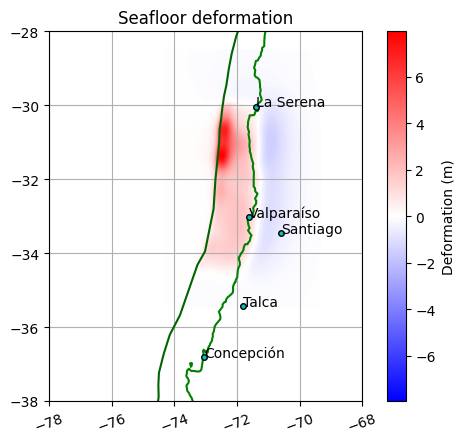

In [55]:
"""
Slip and deformation figure of a Stochastic generation
============================================================================================================
    This example makes a plot of Slip distribution and of deformation in meters.

"""
import scipy.io
import geostochpy
import matplotlib.pyplot as plt
import numpy as np
from geostochpy import modokada as mo
from clawpack.clawutil.data import get_remote_file
# shorelines
shorelines_file = geostochpy.get_data('pacific_shorelines_east_4min.npy')
shore = np.load(shorelines_file)
#
route_trench = geostochpy.get_data('trench-chile.txt')
# load trench
lonfosa, latfosa  = geostochpy.load_trench(route_trench)
file='filter_trues.txt'

folder='/mnt/c/Users/axlph/OneDrive - Universidad de Concepción/magister/Proyecto de Tesis/Slips/Simulation_9.0/'
region=[-78,-68,-38,-28]
#
file='sim_0001.mat'
razon_aspecto=500/180
largo_falla=500000
dx=10
dy=10
with open(folder+file, 'r') as files:
    filename=folder+'/img/'+file.replace(".mat", ".png")
    filename_def=folder+'/img/'+file.replace(".mat", "_def.tt3")
    filename_def2=folder+'/img/'+file.replace(".mat", "_def.png")
    fmat=scipy.io.loadmat(folder+file)
    X_grid=fmat['lon']
    Y_grid=fmat['lat'].reshape(X_grid.shape)
    Slip=fmat['slip'].reshape(X_grid.shape)
    Strike=fmat['strike'].reshape(X_grid.shape)
    Dip=fmat['dip'].reshape(X_grid.shape)
    Rake=fmat['rake'].reshape(X_grid.shape)
    depth=fmat['depth'].reshape(X_grid.shape)
    # plt.hist(Slip.flatten())
    # plt.axvline(np.percentile(Slip,85))
    # plt.show()
    # geostochpy.plot_slip(X_grid,Y_grid,lonfosa,latfosa,Slip,filename)
    geostochpy.plot_slip_gmt([-78,-68,-38,-28],X_grid,Y_grid,lonfosa,latfosa,Slip,dx,dy,filename)
    #geostochpy.plot_slip(X_grid,Y_grid,lonfosa,latfosa,Slip,filename)
    dtopo = mo.okada_solucion_optimized( X_grid, Y_grid,razon_aspecto, Strike, Dip, depth, Rake, Slip, largo_falla, resolucion = 1/30., tamano_buffer = 1., verbose = False ) # calculo deformacion
    deformation=dtopo.dZ_at_t(0)
    X_deformation=dtopo.X
    Y_deformation=dtopo.Y
    # geostochpy.plot_deformation_gmt([-78,-68,-38,-28],X_deformation,Y_deformation,10,10,lonfosa,latfosa,deformation.reshape(X_deformation.shape),filename_def2)
    dtopo.plot_dZ_colors(t=0,dZ_interval=10)
    plt.plot(shore[:,0]-360, shore[:,1], 'g')
    plt.plot(lonfosa,latfosa,'darkgreen')
    plt.axis(region)
    plt.grid(visible=True,axis='both')
    # cities
    # valparaiso
    plt.text(x=-71.63, y=-33.03, s='Valparaíso', color='black', ha='left')
    plt.plot([-71.63], [-33.03], 'co', markersize=4, markeredgecolor='black')
    # la serena
    plt.text(x=-71.4, y=-30.03, s='La Serena', color='black', ha='left')
    plt.plot([-71.4], [-30.03], 'co', markersize=4, markeredgecolor='black')
    # santiago
    plt.text(x=-70.6, y=-33.45, s='Santiago', color='black', ha='left')
    plt.plot([-70.6], [-33.45], 'co', markersize=4, markeredgecolor='black')
    # talca
    plt.text(x=-71.8, y=-35.43, s='Talca', color='black', ha='left')
    plt.plot([-71.8], [-35.43], 'co', markersize=4, markeredgecolor='black')
    # concepcion
    plt.text(x=-73.039, y=-36.812, s='Concepción', color='black', ha='left')
    plt.plot([-73.039], [-36.812], 'co', markersize=4, markeredgecolor='black')
    plt.savefig(filename_def2,dpi=300)
    plt.show()
    dtopo.write(filename_def,dtopo_type=3)
        # geostochpy.plot_slip_gmt(region,X_grid,Y_grid,lonfosa,latfosa,Slip,dx,dy,filename)

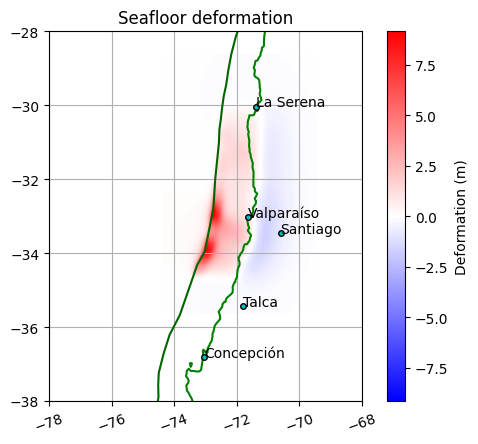

In [50]:
dtopo.plot_dZ_colors(t=0,dZ_interval=10)
plt.plot(shore[:,0]-360, shore[:,1], 'g')
plt.plot(lonfosa,latfosa,'darkgreen')
plt.axis(region)
plt.grid(visible=True,axis='both')
# cities
# valparaiso
plt.text(x=-71.63, y=-33.03, s='Valparaíso', color='black', ha='left')
plt.plot([-71.63], [-33.03], 'co', markersize=4, markeredgecolor='black')
# la serena
plt.text(x=-71.4, y=-30.03, s='La Serena', color='black', ha='left')
plt.plot([-71.4], [-30.03], 'co', markersize=4, markeredgecolor='black')
# santiago
plt.text(x=-70.6, y=-33.45, s='Santiago', color='black', ha='left')
plt.plot([-70.6], [-33.45], 'co', markersize=4, markeredgecolor='black')
# talca
plt.text(x=-71.8, y=-35.43, s='Talca', color='black', ha='left')
plt.plot([-71.8], [-35.43], 'co', markersize=4, markeredgecolor='black')
# concepcion
plt.text(x=-73.039, y=-36.812, s='Concepción', color='black', ha='left')
plt.plot([-73.039], [-36.812], 'co', markersize=4, markeredgecolor='black')
plt.savefig(filename_def2)
plt.show()